# TFM

## Importación de librerías

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lectura de fichero

In [14]:
NOT_DATA = '../simulator/inventario-1anio.csv'

DATA = '../../data/datos_simulacion.csv'

df = pd.read_csv(DATA).drop(columns=[
    'Unnamed: 0',
    'Tiempo (dia)'
])

display(df)

,Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,"12893,88",-5815,"5182,03","12260,91","12227,21","-33,7","334,94",0
1,"12227,21",-5465,"8101,64","14863,85","14752,25","-111,6","236,94",0
2,"14752,25",-6085,"7041,96","15709,21","15669,81","-39,4","258,9",0
3,"15669,81",-6275,"8981,45","18376,26","18423,4","47,14","195,11",0
4,"18423,4",-5925,"6892,9","19391,3","19476,43","85,13","154,27",0
...,...,...,...,...,...,...,...,...
86,"21034,2",-6165,"6183,48","21052,68","21092,69","40,01","-165,81",1
87,"21092,69",-6295,"6354,59","21152,28","21091,01","-61,27","-258,36",1
88,"21091,01",-6185,"6971,0","21877,01","21890,53","13,52","-103,98",1
89,"21890,53",-5635,"4697,6","20953,13","21009,61","56,48","18,23",1


# Limpieza de datos

In [15]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for column in bad_formatted_fields:
    df[column] = df[column].str.replace(',', '.')
    df[column] = pd.to_numeric(df[column])


display(df)

,Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,12893.88,-5815,5182.03,12260.91,12227.21,-33.70,334.94,0
1,12227.21,-5465,8101.64,14863.85,14752.25,-111.60,236.94,0
2,14752.25,-6085,7041.96,15709.21,15669.81,-39.40,258.90,0
3,15669.81,-6275,8981.45,18376.26,18423.40,47.14,195.11,0
4,18423.40,-5925,6892.90,19391.30,19476.43,85.13,154.27,0
...,...,...,...,...,...,...,...,...
86,21034.20,-6165,6183.48,21052.68,21092.69,40.01,-165.81,1
87,21092.69,-6295,6354.59,21152.28,21091.01,-61.27,-258.36,1
88,21091.01,-6185,6971.00,21877.01,21890.53,13.52,-103.98,1
89,21890.53,-5635,4697.60,20953.13,21009.61,56.48,18.23,1


## Descripción de campos

In [16]:
df['Fugando combustible'].value_counts(normalize=True)

Fugando combustible
1    0.846154
0    0.153846
Name: proportion, dtype: float64

<!-- TODO -->

## Generación de conjuntos de datos

### _FS1_

In [25]:
FS1 = df.filter(items=['Variacion', 'Fugando combustible'])

display(FS1.head())

,Variacion,Fugando combustible
0,147.54,0
1,99.57,0
2,36.20,0
3,20.39,0
4,6.73,0


### _FS2_

In [26]:
FS2 = df.filter(items=['Variacion Acum.', 'Fugando combustible'])

display(FS2.head())

,Variacion Acum.,Fugando combustible
0,93.93,0
1,188.84,0
2,227.83,0
3,300.21,0
4,265.71,0


### _FS3_

In [27]:
FS3 = pd.DataFrame(
    data={
        'Variation over sales': df['Variacion'] / df['Venta (L)'],
        'Fugando combustible': df['Fugando combustible']
    })

display(FS3.head())

,Variation over sales,Fugando combustible
0,-0.024529,0
1,-0.016567,0
2,-0.005920,0
3,-0.003244,0
4,-0.001103,0


### _FS4_

In [28]:
FS4 = pd.DataFrame(
    data={
        'Cumilative variation over sales': (df['Variacion'] / df['Venta (L)']).cumsum(),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS4.head())

,Cumilative variation over sales,Fugando combustible
0,-0.024529,0
1,-0.041096,0
2,-0.047016,0
3,-0.050260,0
4,-0.051363,0


### _FS5_

In [29]:
FS5 = pd.DataFrame(
    data={
        'Variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS5.head())

,Variation over real time,Fugando combustible
0,0.007732,0
1,0.004512,0
2,0.001814,0
3,0.000869,0
4,0.000315,0


### _FS6_

In [30]:
FS6 = pd.DataFrame(
    data={
        'Cumulative variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']).cumsum(),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS6.head())

,Cumulative variation over real time,Fugando combustible
0,0.007732,0
1,0.012244,0
2,0.014058,0
3,0.014927,0
4,0.015242,0


### _FS7_

In [31]:
FS7 = pd.DataFrame(
    data={
        'Variation over sales': df['Variacion'] / df['Venta (L)'],
        'Variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS7.head())

,Variation over sales,Variation over real time,Fugando combustible
0,-0.024529,0.007732,0
1,-0.016567,0.004512,0
2,-0.005920,0.001814,0
3,-0.003244,0.000869,0
4,-0.001103,0.000315,0


### _FS8_

In [32]:
FS8 = pd.DataFrame(
    data={
        'Variation': df['Variacion'],
        'Sales': df['Venta (L)'],
        'Fugando combustible': df['Fugando combustible']
    })

display(FS8.head())

,Variation,Sales,Fugando combustible
0,147.54,-6015,0
1,99.57,-6010,0
2,36.20,-6115,0
3,20.39,-6285,0
4,6.73,-6100,0


### Unificación de conjuntos de datos

In [33]:
project_datasets = [
    FS1,
    FS2,
    FS3,
    FS4,
    FS5,
    FS6,
    FS7,
    FS8,
]

## Preprocesados de datos

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for dataset in project_datasets:
    for column in dataset.columns:
        if column == 'Fugando combustible':
            continue
        dataset[column] = MinMaxScaler().fit_transform(dataset[[column]])

## Implementación de modelos

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

OBJECTIVE_VARIABLE = 'Fugando combustible'

conf_matrix_list = []

model_history = None

for i, dataset in enumerate(project_datasets):

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.drop(columns=OBJECTIVE_VARIABLE),
        dataset[OBJECTIVE_VARIABLE],
        stratify=dataset[OBJECTIVE_VARIABLE]
    )

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 4,
        validation_data = (X_test, y_test),
        verbose = 0
    )

    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)
    conf_matrix_list.append(confusion_matrix(y_test, y_pred))

    print(f'Accuracy (FS{i + 1}): {accuracy_score(y_test, y_pred):.4f}')

    model_history = history

Accuracy (FS1): 0.4286
Accuracy (FS2): 0.7143
Accuracy (FS3): 0.4286
Accuracy (FS4): 0.4286
Accuracy (FS5): 0.4286
Accuracy (FS6): 0.5714
Accuracy (FS7): 0.4286
Accuracy (FS8): 0.4286


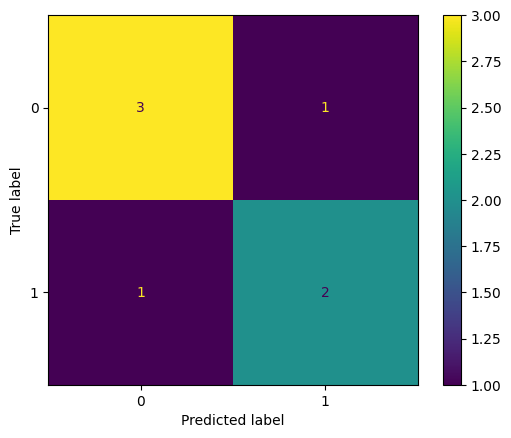

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(conf_matrix_list[1]).plot()